In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
ff = pd.read_csv('forestfires.csv')

In [3]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
ff.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [29]:
ff.drop(['month','day'], inplace=True, axis=1)

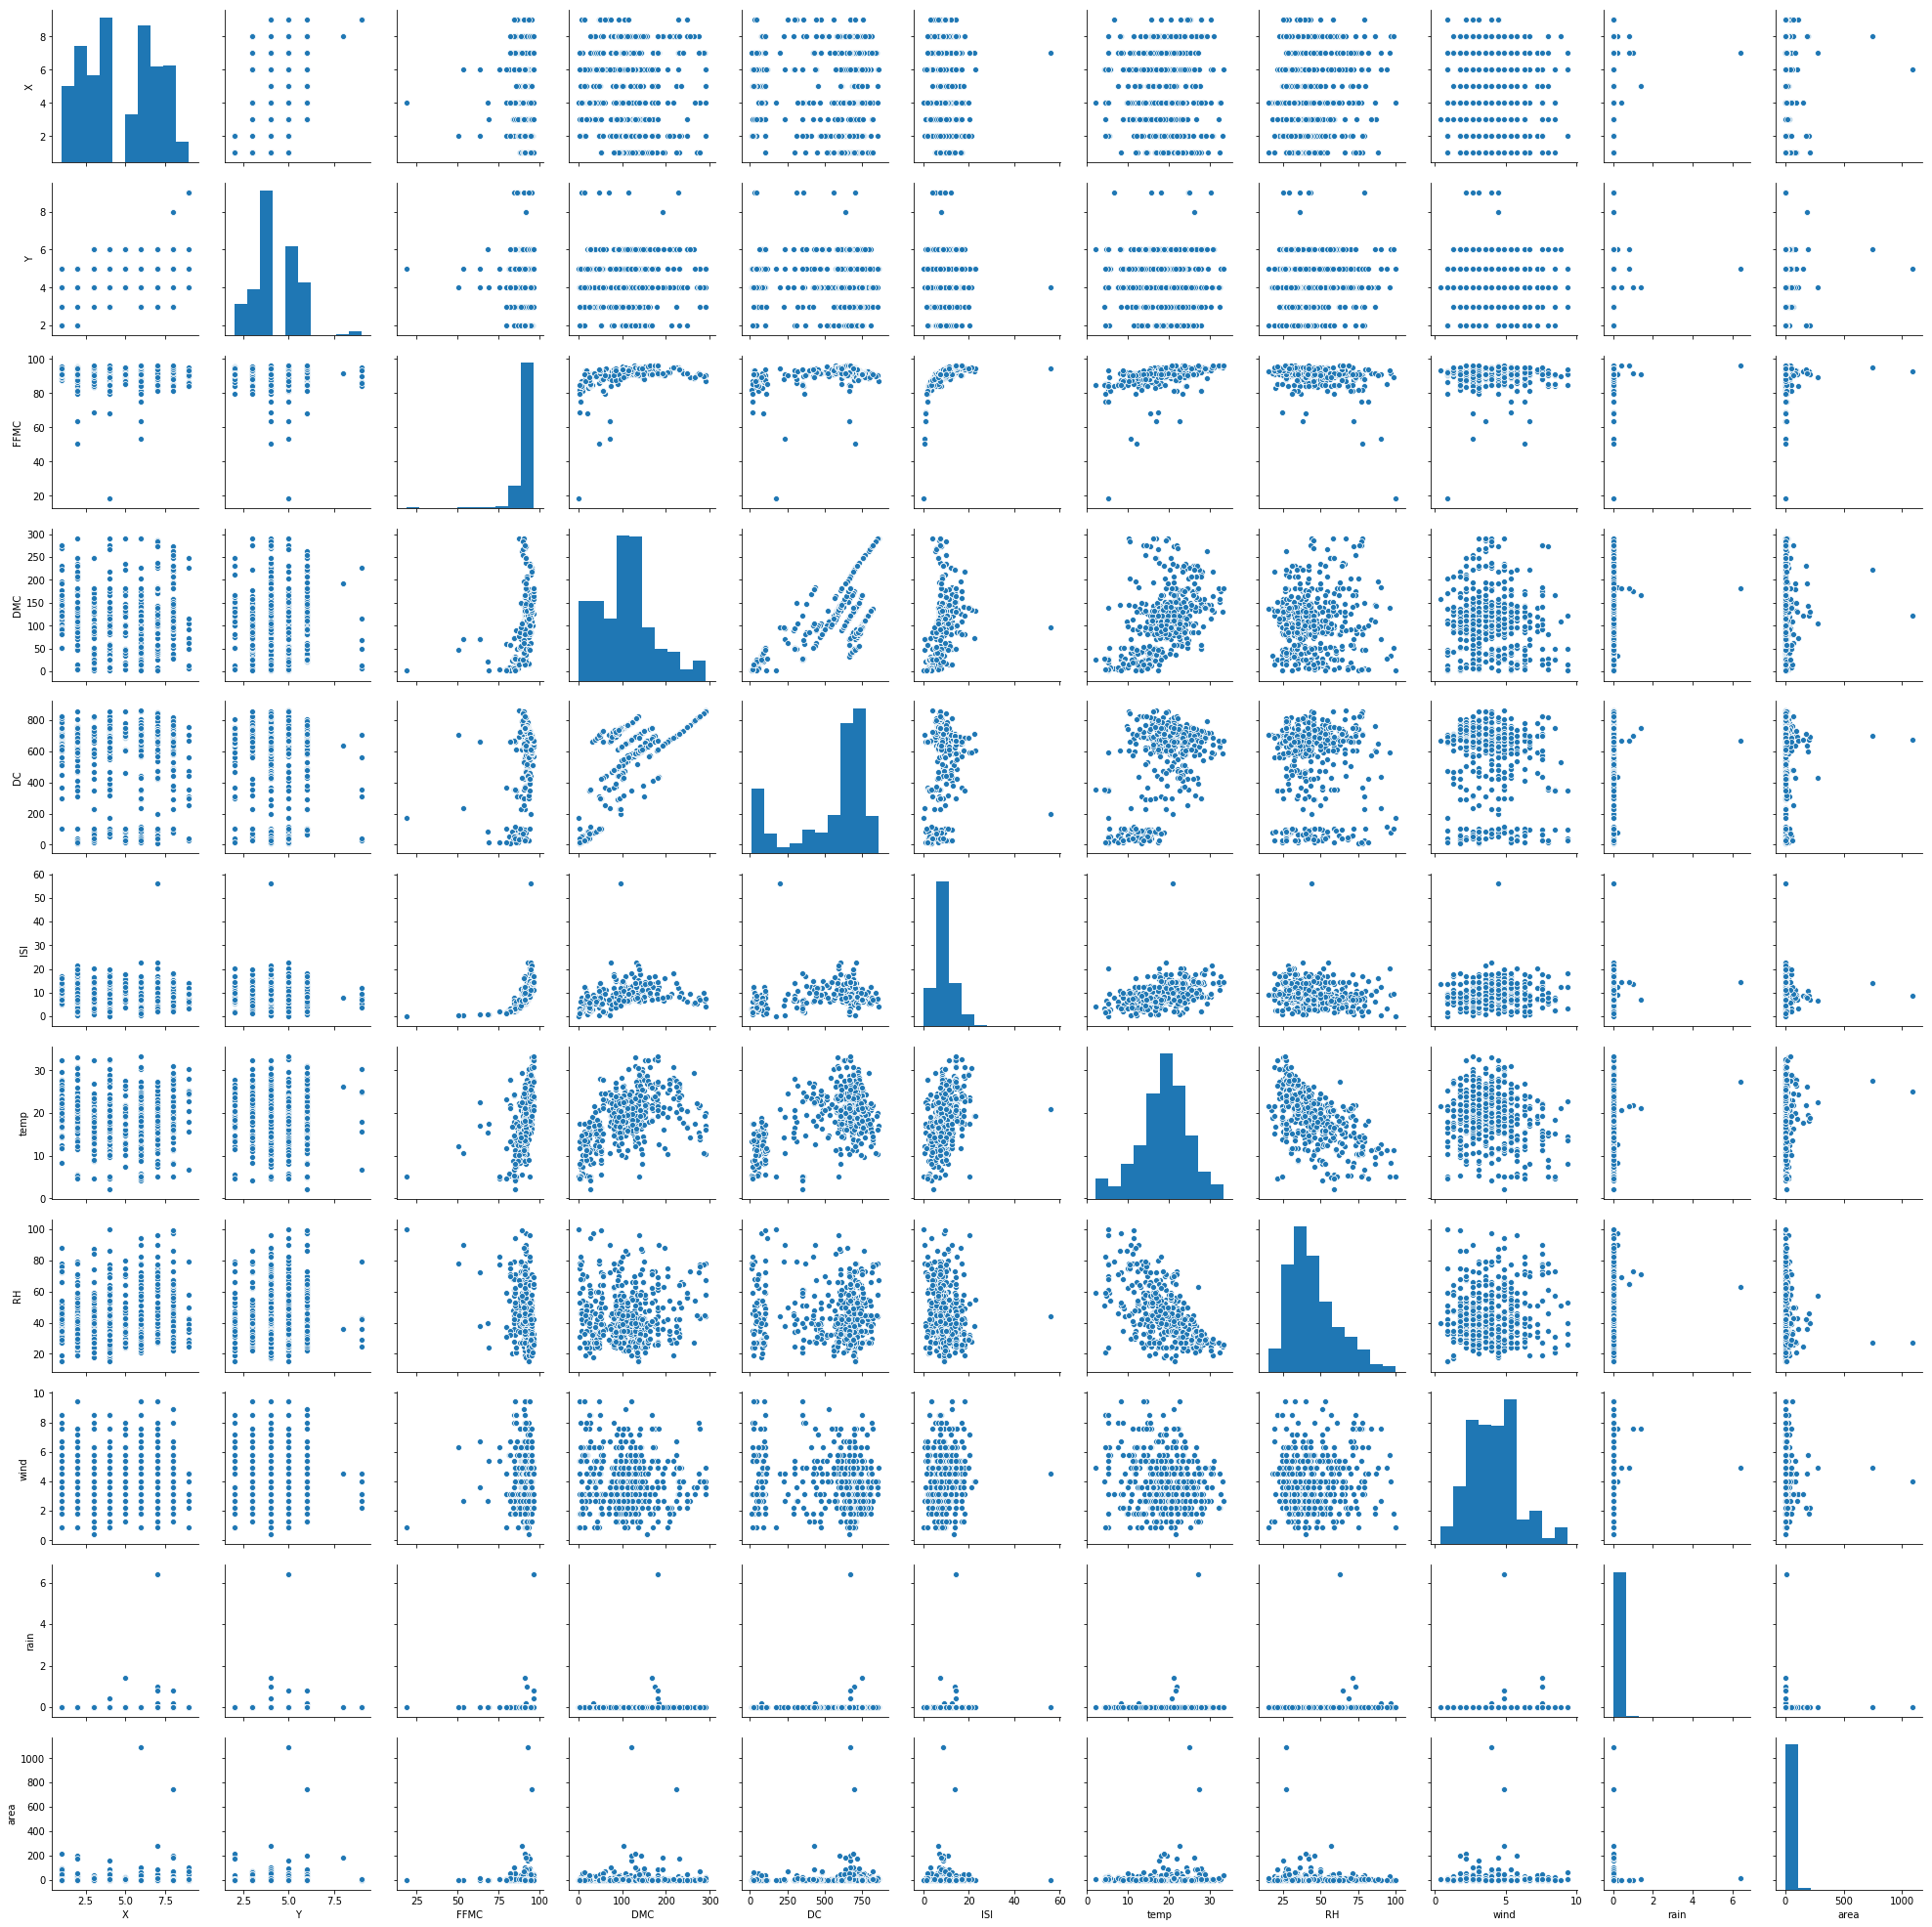

In [5]:
sns.pairplot(ff)

In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [64]:
x = ff.loc[:,ff.columns!='area']
y = np.array(ff.loc[:,ff.columns=='area'])

In [60]:
from sklearn.preprocessing import Normalizer

In [61]:
X = Normalizer().fit_transform(X=x)

In [63]:
X

array([[0.04971858, 0.03551327, 0.6122488 , ..., 0.36223537, 0.04758778,
        0.        ],
       [0.01033578, 0.00590616, 0.13377448, ..., 0.04872581, 0.00132889,
        0.        ],
       [0.01006842, 0.00575338, 0.13031407, ..., 0.04746539, 0.00186985,
        0.        ],
       ...,
       [0.01033939, 0.00590822, 0.12052771, ..., 0.10339387, 0.00989627,
        0.        ],
       [0.00156048, 0.0062419 , 0.14730888, ..., 0.06553997, 0.0062419 ,
        0.        ],
       [0.04366572, 0.02183286, 0.57857075, ..., 0.2256062 , 0.03274929,
        0.        ]])

In [17]:
y.head()

,area
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [67]:
X_train

array([[0.00851333, 0.00709444, 0.13053773, ..., 0.09932218, 0.00312155,
        0.        ],
       [0.00156048, 0.0062419 , 0.14730888, ..., 0.06553997, 0.0062419 ,
        0.        ],
       [0.00134597, 0.00672985, 0.12571368, ..., 0.03634121, 0.00363412,
        0.        ],
       ...,
       [0.00292094, 0.00292094, 0.13450922, ..., 0.08178628, 0.00452745,
        0.        ],
       [0.00499256, 0.0124814 , 0.22666215, ..., 0.12731024, 0.0044933 ,
        0.        ],
       [0.00300902, 0.00601804, 0.14262763, ..., 0.06018043, 0.00601804,
        0.        ]])

In [68]:
regressor = SVR(C=1.0, epsilon=0.1)
regressor.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
regressor.support_vectors_

array([[0.00851333, 0.00709444, 0.13053773, ..., 0.09932218, 0.00312155,
        0.        ],
       [0.00156048, 0.0062419 , 0.14730888, ..., 0.06553997, 0.0062419 ,
        0.        ],
       [0.00134597, 0.00672985, 0.12571368, ..., 0.03634121, 0.00363412,
        0.        ],
       ...,
       [0.03152829, 0.03941037, 0.72042152, ..., 0.22858013, 0.02443443,
        0.        ],
       [0.00499256, 0.0124814 , 0.22666215, ..., 0.12731024, 0.0044933 ,
        0.        ],
       [0.00300902, 0.00601804, 0.14262763, ..., 0.06018043, 0.00601804,
        0.        ]])

In [71]:
regressor.shape_fit_

(387, 10)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
regressor = LinearRegression()

In [74]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
regressor.coef_

array([[  629.01380503,  -193.81120585,   -56.23607784,    69.56562726,
          -55.30610861,  -213.23098741,    63.00656464,   -51.15233362,
           22.8093263 , -1464.66268364]])